Nikhil Gopal Homework 1

# Question 1

(10 points) Write an example for each of the following. Avoid using examples that were already discussed in class. Examples do not necessarily have to be programming related:

- $O(1)$
  - Pulling out the first item on the first shelf in your fridge.
  - Analagous to array indexing.
* $O(log n)$
  * Looking for your name tag in an alphabetically ordered list of name tags, you start at the middle if the letter of your name is before the middle letter, you eliminate the right half of names. If the letter of your name is after the middle letter, you eliminate the left half of the names. If your name tag is found, you stop. Repeat this process until you find your nametag.
  * Binary search  
* $O(n)$
  * Looking through every shelf of your fridge, item by item, until you find the eggs, and pulling it out.
  * Analagous to linear search.
* $O(n log n)$
  * You are a warehouse inventory manager who works for a company that makes business cards. One of your most important clients recently placed an order of business cards in bulk for their employees. One of the partners of the firm recently had an affair that was exposed in the newspapers, so you are instructed to find and destroy all business cards with their name on it. There are n boxes that contain n business cards each. The business cards are all in alphabetical order. You open each box one by one and within each box, you use binary search to find the partner's business cards and remove them. Once you do so, you destroy the business cards.
  * iteration through an arary * binary search
* $O(n^2$)$
  * You are staying at your friend's apartment building and you brought n bags with you. Your friend didn't want to leave your keys in the open since people were visiting the house, so they hid them in one of their Russian babushka dolls. There are n babuskha dolls and n child dolls nested within each of them. You open each babuskha doll and it's children one by one until you find your keys.
  * Example of nested iteration.

# Question 2

(20 points) Write code to populate an array with the size n with numbers from 0 to n-1. Afterwards, shuffle (randomly reorder or rearrange)  the numbers in the array.

Do not use any built-in functions such as shuffle(). However, feel free to use the  built-in random() function.

Examples:

 ```  python [0, 1, 2, 3] -> shuffled: [2, 0, 3, 1]
[0, 1, 2, 3, 4, 5] -> shuffled: [5, 2, 4, 1, 3, 0]
```



And finally, provide the Big O notation for both the average and worst case time complexities of your code.


In [248]:
import random


def populate_and_shuffle_set(arr_len):
    random_set = set()
    return_array = []
    while len(random_set) < arr_len:
        rand_num = random.randint(0, arr_len - 1)
        if rand_num not in random_set:
            random_set.add(rand_num)
            return_array.append(rand_num)
    return return_array

populate_and_shuffle_set(5)



[3, 2, 1, 0, 4]

In [249]:
#Fisher-Yates shuffle

import random

def shuffle_array(n: int) -> list:
    array = list(range(n))
    pointer = 0
    
    while pointer < n - 1:
        rand_num = random.randint(pointer, n - 1)
        array[pointer], array[rand_num] = array[rand_num], array[pointer]
        
        pointer += 1
        
    return array
        

shuffle_array(8)
    

[1, 5, 7, 4, 6, 2, 3, 0]

I wrote two implementations, one using the Fisher-Yates shuffle which uses a pointer that starts at the beginning or end of an array. It will then move over one index at a time. A random number will be generated, and the number at the index of the pointer will be switched with that index. The pointer is then moved over, blocking off that section of the array. When the random numbers are generated, they have to be generated between the pointer and the length of the array - 1 so that blocked off indexes cannot be swapped. If a number that has been swapped to a later index is latter swapped as the pointer moves, that is fine, and still results in a random shuffling of the array.

The other implementation generates random numbers and adds them to the set. If the number generated is already in the set, it will not be added, but if it is not, it will be, resulting in a randomly generated list of numbers.

The fisher-yates implementation is more efficient, which has an average and worst case time complexity of $O(n)$.

Initializing the array and declaring the pointer are all $O(1)$ operations, as are the random number generation and the array index swapping within the while loop. Since the while loop will run at most n - 1 times for either the average or worst case, the overall time complexity is $O(n)$

# Question 3

(35 points) Write a function that accepts a sorted array of integers and a target value. The array may contain duplicate values. It should return the number of occurrences of the target value.

```
[0, 1, 2, 3, 3, 3, 3, 3, 3, 4, 4, 5] Target: 3, should return 6
[1, 1, 2, 3, 3, 4, 5, 5, 5] Target: 5, should return 3
[1, 1, 2, 3, 3, 4, 5, 5, 5] Target: 6, should return 0
```

Full credit for a O(log n) solution and partial credit otherwise.

In [250]:
def bin_search_first_occrence(array: list, target:int):
    beginning_index, ending_index = 0, len(array) - 1
    first_occurence = "Not Found"
    
    while beginning_index <= ending_index:
        
        middle_index = (beginning_index + ending_index) // 2
        
        if array[middle_index] == target:
            first_occurence = middle_index
            #move to left if index is found, in case its not the first occurence
            ending_index = middle_index - 1 
        elif array[middle_index] < target:
            #if the middle is less than target, the target is to the right of middle. Thus, start searching from middle + 1
            beginning_index = middle_index + 1 
        else:
            #if the middle is less than target, the target is to the left of middle. Thus, start searching from middle - 1
            ending_index = middle_index - 1    
    return first_occurence


def bin_search_last_occrence(array: list, target:int):
    beginning_index, ending_index = 0, len(array) - 1
    last_occurence = "Not Found"
    
    while beginning_index <= ending_index:
        
        middle_index = (beginning_index + ending_index) // 2
        
        if array[middle_index] == target:
            last_occurence = middle_index
            #move to right if index is found, in case its not the last occurence
            beginning_index = middle_index + 1             
        elif array[middle_index] < target:
            #if the middle is less than target, the target is to the right of middle. Thus, start searching from middle + 1
            beginning_index = middle_index + 1 
        else:
            #if the middle is less than target, the target is to the left of middle. Thus, start searching from middle - 1
            ending_index = middle_index - 1    
    return last_occurence

def count_occurences(array: list, target: int) -> int:
    first_index = bin_search_first_occrence(array, target)
    last_index = bin_search_last_occrence(array, target)
    
    try:
        # we add 1 since indexing starts at 0
        num_occurences = last_index - first_index + 1
    except:
        num_occurences = 0
    
    return num_occurences

The objective is to make the algorithm more efficient by running it in $O(logn)$ time. It would be simple to do in $O(n)$ time with for loops, but this is less efficient than it could be. This algorithm is a modified version of binary search, which identifies the first and the last index of the occurence of the target, and then subtracts them to find the total number. 

To find the real first and last digit, we increment the beginning or ending value so that the algorithm doesn't stop when the target value is found for the first time. Binary search is $O(log n)$, hence this algorithm runs in $O(log n)$ time.


# Question 4

(35 points) Write a function that accepts a sorted, rotated array and returns the index of the largest value. Assume that the array is sorted in ascending order.

A rotated array is an array that has had its elements shifted or rotated circularly to the left or right by a certain number of positions. This rotation does not change the elements themselves but changes their positions within the array.

Examples:

```
[1, 2, 3, 4, 5] -> [4, 5, 1, 2, 3] # max value index: 1 (value: 5)
[0, 1, 3, 5, 7, 11] -> [5, 7, 11, 0, 1, 3] # max value index: 2 (value: 11)
```

Full credit for a O(log n) solution and partial credit otherwise.



In [251]:
def rotated_binary_search(array: list[int]) -> int:
    left_pointer = 0
    right_pointer = len(array) - 1

        
    while left_pointer < right_pointer:
        middle_index = (right_pointer + left_pointer) // 2
        
        if array[middle_index] > array[right_pointer]: #if middle > right most, the greatest val is to the left of middle, or in the right half
            print(f"Middle: {array[middle_index]} Right pointer: {right_pointer}, Array: {array}")
            left_pointer = middle_index + 1
        else:
            right_pointer = middle_index # if not, the biggest value is to the left of the middle
            
        
    #left pointer is the smallest index. Left pointer - 1 is thus the biggest due to the rotation.
    if left_pointer == 0: #but if the left_pointer == 0, it means the biggest index is the last value in the array
        return len(array) - 1
    return left_pointer - 1        

This solution achieves the desired result in $O(log n)$ time. It works by checking if the middle value is greater than the last value in the search space. If this is the case, we know that the largest value is in the right half, the middle value or immediately left of it. Although the array is shuffled, it is also ordered, so we know this for certain. Thus, we can narrow down the search space to the right half of the array.

Otherwise, we know the greatest value is in the left half, and we shift the search space accordingly.

To test the runtime, let's plot the input array length vs the number of loop iterations. To keep it simple, will generate arrays of ordered lists, but the runtime will still be the same as if the array were ordered properly or not:

In [252]:
def rotated_binary_search(array: list[int]) -> int:
    left_pointer = 0
    right_pointer = len(array) - 1

    iterations = 0
        
    while left_pointer < right_pointer:
        middle_index = (right_pointer + left_pointer) // 2
        
        if array[middle_index] > array[right_pointer]: #if middle > right most, the greatest val is to the left of middle, or in the right half
            print(f"Middle: {array[middle_index]} Right pointer: {right_pointer}, Array: {array}")
            left_pointer = middle_index + 1
        else:
            right_pointer = middle_index # if not, the biggest value is to the left of the middle
        
        iterations += 1    
        
    #left pointer is the smallest index. Left pointer - 1 is thus the biggest due to the rotation.
    if left_pointer == 0: #but if the left_pointer == 0, it means the biggest index is the last value in the array
        return len(array) - 1, len(array), iterations
    return left_pointer - 1, len(array), iterations

This code takes ~1.5 minutes to run since I run it 100,000x

In [238]:
iterations = []
arr_length = []

for i in range(100000):
    tmp = [n for n in range(i)]
    val, length, n_iterations = rotated_binary_search(tmp)
    iterations.append(n_iterations)
    arr_length.append(length)
    
    

/var/folders/hj/xknsfbyn3812mccyt1jqctmc0000gn/T/ipykernel_30313/3775889542.py:6: RuntimeWarning: divide by zero encountered in log2
  plt.plot(arr_length, np.log2(arr_length, where=(arr_length != 0)), label='y=log2(x)', linestyle='--')


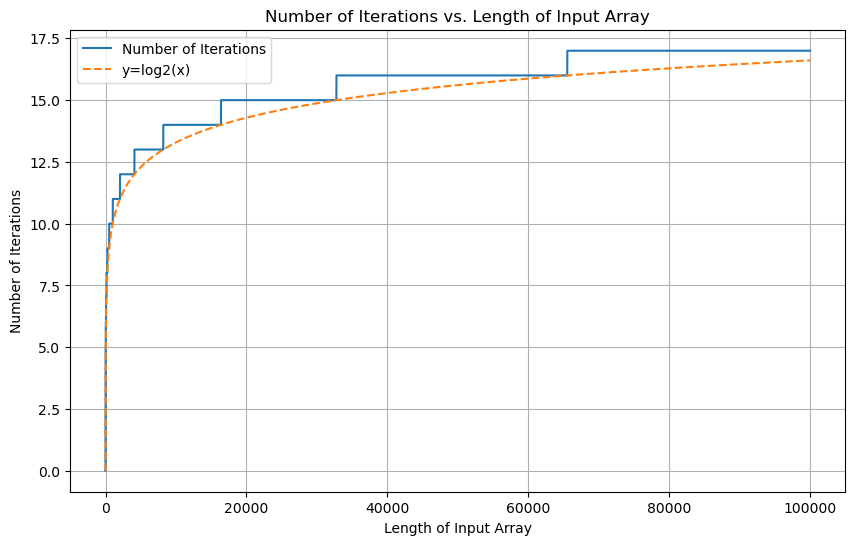

In [247]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(arr_length, iterations, label='Number of Iterations')
plt.plot(arr_length, np.log2(arr_length, where=(arr_length != 0)), label='y=log2(x)', linestyle='--')
plt.xlabel('Length of Input Array')
plt.ylabel('Number of Iterations')
plt.legend()
plt.title('Number of Iterations vs. Length of Input Array')
plt.grid(True)
plt.show()

Our number of iterations is discrete, not continuous, hence why the curve looks like a step function. However, we can clearly see that it follows logarithmic and not linear tendencies.

Testing code (can ignore):

In [209]:
#Cell generated with AI

def generate_test_cases(num_cases: int):
    test_cases = []
    for _ in range(num_cases):
        # Generate a random sorted array of random length (5 to 20 elements)
        length = random.randint(5, 20)
        sorted_array = sorted(random.sample(range(1, 100), length))
        
        # Rotate the array at a random pivot
        pivot = random.randint(0, length - 1)
        rotated_array = sorted_array[pivot:] + sorted_array[:pivot]
        
        test_cases.append(rotated_array)
    return test_cases


In [212]:
generate_test_cases(3)

[[46, 56, 58, 68, 10, 38],
 [62,
  66,
  74,
  76,
  79,
  81,
  88,
  95,
  97,
  4,
  17,
  22,
  33,
  34,
  35,
  39,
  44,
  46,
  50,
  55],
 [28, 29, 34, 36, 38, 44, 61, 67, 74, 81, 82, 83, 85, 95, 4, 6, 20, 26]]

In [207]:
#Cell generated with AI
def test_rotated_binary_search():
    test_cases = generate_test_cases(50)
    all_passed = True
    
    for i, case in enumerate(test_cases):
        # Expected result
        expected_result = case.index(max(case))
        
        # Function result
        result = rotated_binary_search(case)
        
        if result != expected_result:
            all_passed = False
            print(f"Test case {i + 1} failed:")
            print(f"Array: {case}")
            print(f"Expected: {expected_result}, Got: {result}")
    
    if all_passed:
        print("All test cases passed.")
    else:
        print("Some test cases failed.")
